In [161]:
import numpy as np
import pandas as pd
import sklearn
from scipy import stats
from sklearn.datasets import load_wine
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics as mtr
import matplotlib as plt

In [162]:
wine = load_wine()

wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [163]:
np.unique(wine.target)

array([0, 1, 2])

In [164]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [165]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [166]:
wine.data.shape, wine.target.shape

((178, 13), (178,))

In [167]:
wine_df = pd.DataFrame(data = np.c_[wine['data'], wine['target']],
                        columns = wine['feature_names'] + ['target'])

In [168]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [169]:
wine_X_train, wine_X_test, wine_Y_train, wine_Y_test = train_test_split(wine.data, wine.target, test_size=0.5, random_state=1)
wine_X_train.shape, wine_X_test.shape, wine_Y_train.shape, wine_Y_test.shape

((89, 13), (89, 13), (89,), (89,))

In [170]:
cls_simple = KNeighborsClassifier(n_neighbors=5)
cls_simple.fit(wine_X_train, wine_Y_train)
target_simple = cls_simple.predict(wine_X_test)
target_simple

array([1, 1, 2, 1, 0, 1, 2, 0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1,
       2, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2,
       0, 2, 1, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 2, 1, 0,
       1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 2, 2, 1, 0,
       1])

In [171]:
mtr.accuracy_score(wine_Y_test, target_simple)

0.7078651685393258

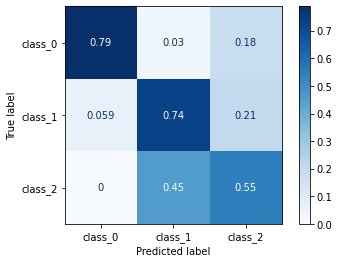

In [172]:
matrix = mtr.ConfusionMatrixDisplay.from_predictions(wine_Y_test, target_simple, display_labels=wine.target_names, cmap=plt.cm.Blues, normalize='true')

In [173]:
mtr.f1_score(wine_Y_test, target_simple, average='micro')

0.7078651685393259